# INM427 Neural Computing
## Group work
### Supanut Sookkho (MSc Data Science / 230024841) & Yumi Heo (Msc Data Science / 230003122)

***

## Binary Classification for Bank Churn

***

In [1]:
# Import libraries

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate random numbers.

random.seed(123)

In [3]:
# The dataset is from Kaggle, and this dataset is about whether a customer will keep their bank account or not.
# Dataset URL: https://www.kaggle.com/competitions/playground-series-s4e1)
# We use only the train set in Kaggle since the test set does not have their target data(the column name with 'Exited') due to the competition.
# We renamed the file of the train set into 'bank_churn_data.csv'.

df = pd.read_csv('bank_churn_data.csv')

In [4]:
df

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2          1               0   
1       33.0       1       0.00              2          1               1   
2       40.0      10       0.00              2          1               0   
3       34.0       2  148882.54              1          1               1   
4       33.0       5       0.00              2          1               1   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1          1               1   
165030  35.0       3       0.00              1          0               0   
165031  31.0       5       0.00              1          1               1   
165032  30.0       7  161533.00              1          0               1   
165033  31.0       1       0.00              1          1               0   

        EstimatedSalary  Exited  
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
4              15068.83       0  
...                 ...     ...  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  
165032         71173.03       0  
165033         61581.79       1  

[165034 rows x 14 columns]

In [5]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Check the number of values in 'Gender' and 'Geography'.

print(df['Gender'].nunique())
print(df['Geography'].nunique())

2
3


In [8]:
# Remove irrelevant features.

df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [9]:
# Change the string data to numerical one in 'Gender'.

map_dict = {'Female' : 0, 'Male' : 1}
df['Gender'] = df['Gender'].map(map_dict).astype(int)

In [10]:
df['Gender'].value_counts()

1    93150
0    71884
Name: Gender, dtype: int64

In [11]:
df['Geography'].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [12]:
# Change the string data to numerical one in 'Geography'.

map_dict = {'France' : 0, 'Spain' : 1, 'Germany' : 2}
df['Geography'] = df['Geography'].map(map_dict).astype(int)

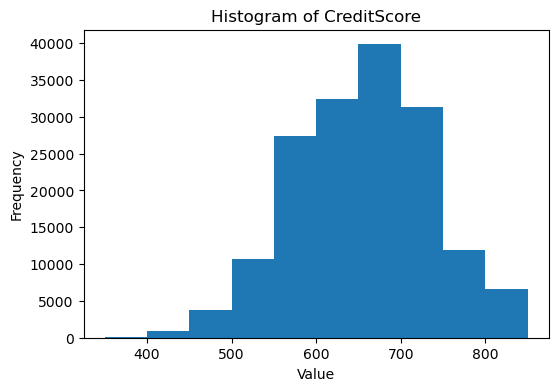

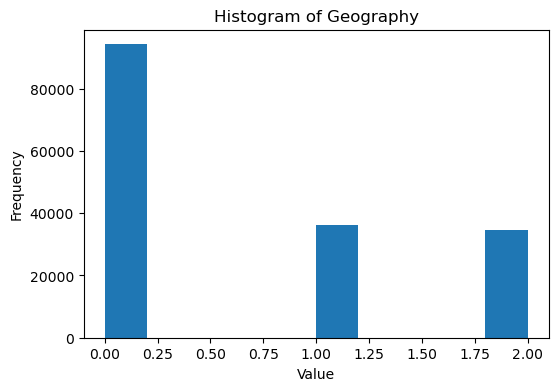

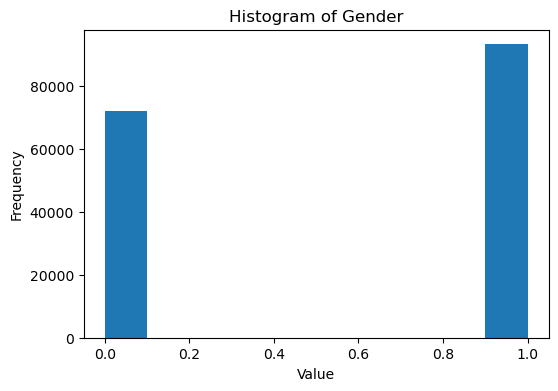

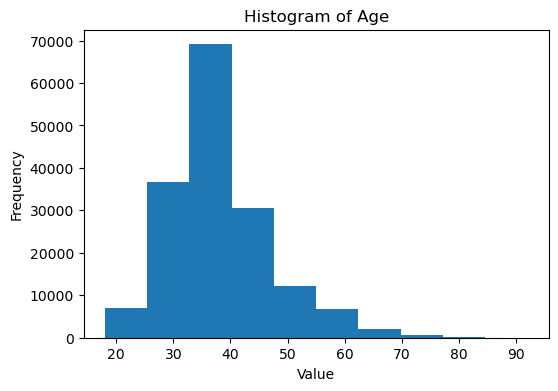

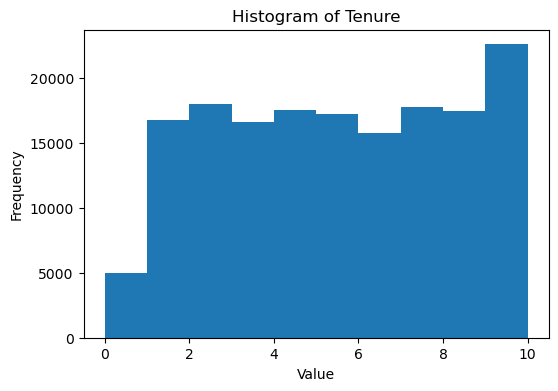

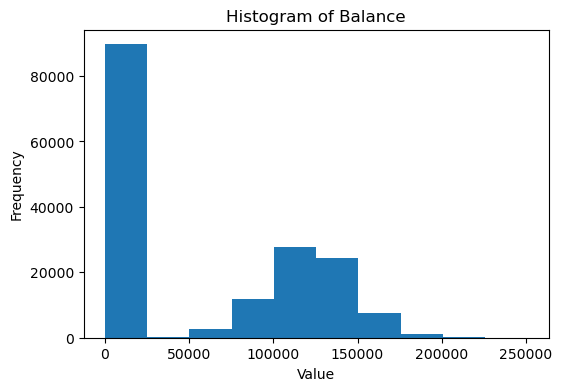

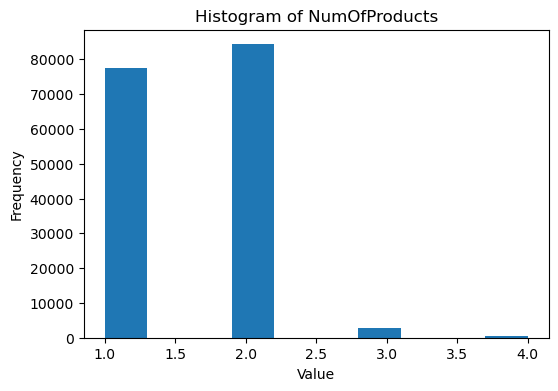

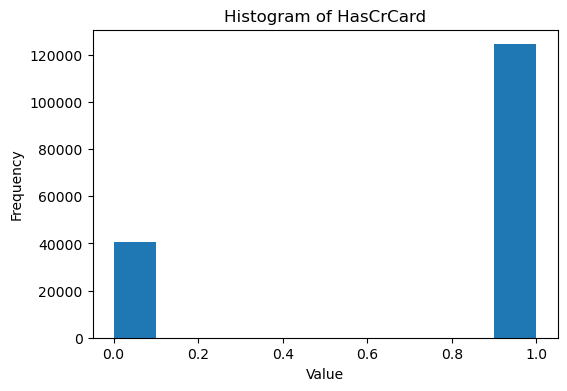

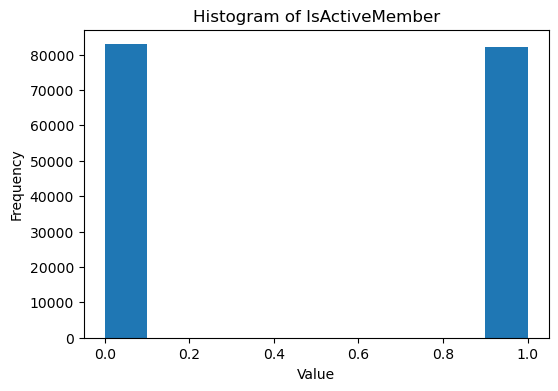

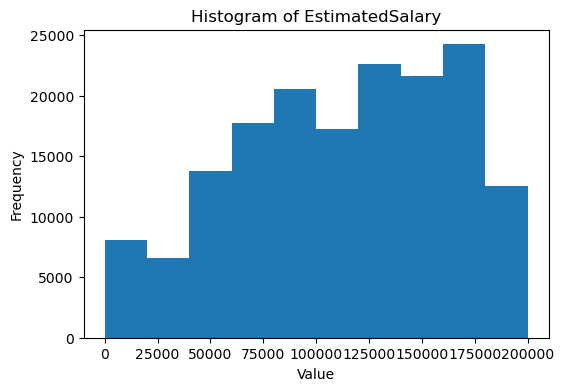

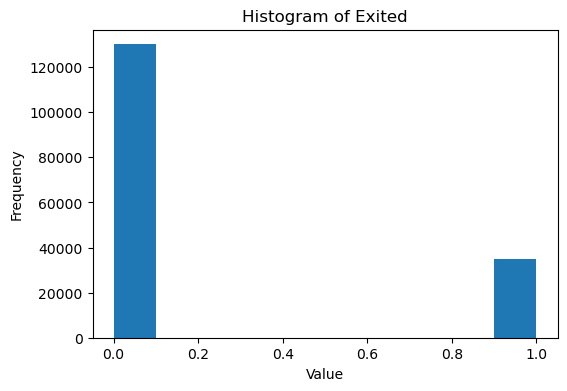

In [17]:
# Check each distribution.

for column in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=10)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

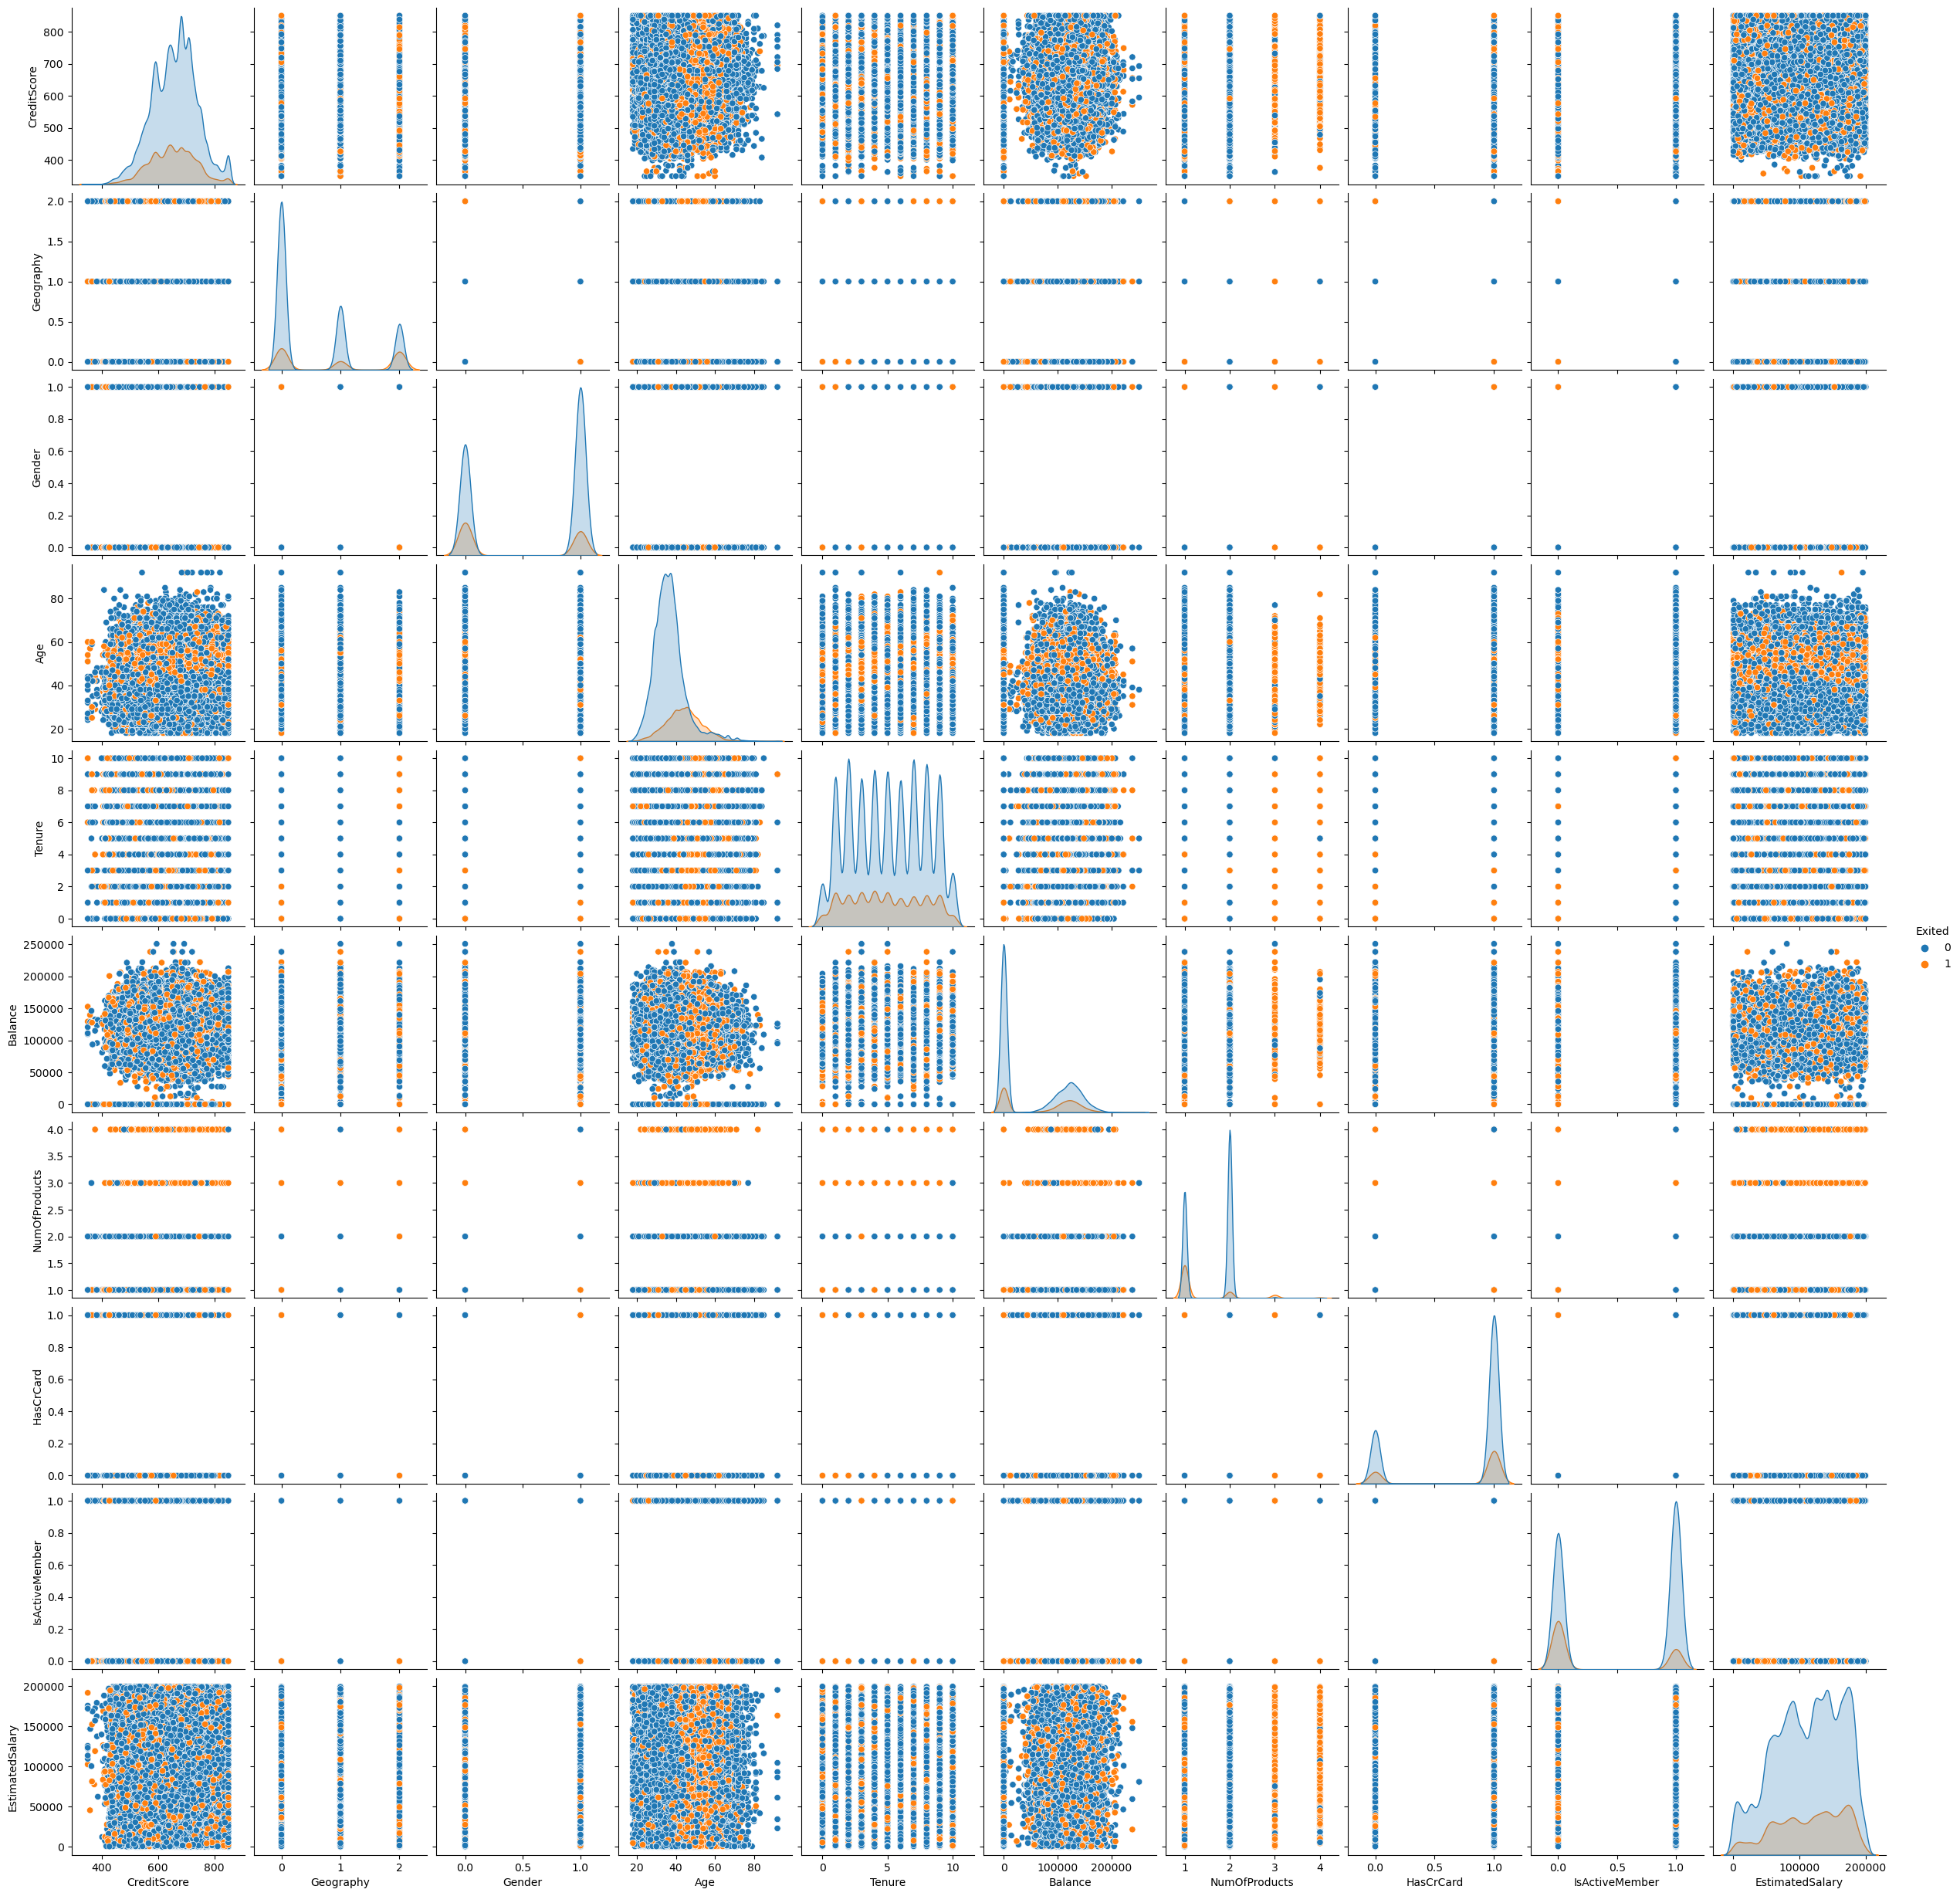

In [21]:
# As plotting the pairplot below takes a lot of time, we commented out the code below after plotting the graph.

#sns.pairplot(df, hue="Exited")

In [13]:
# There is a large proportion of the 'Balance' being 0.
# We will determine whether to remove the data with 0 in 'Balance' by conducting statistical analysis on the 'Balance' and rechecking the distribution of the other features and 'Exited'(target) that appear when the balance is 0.

df['Balance'].value_counts()

0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: Balance, Length: 30075, dtype: int64

In [14]:
df['Balance'].describe()

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

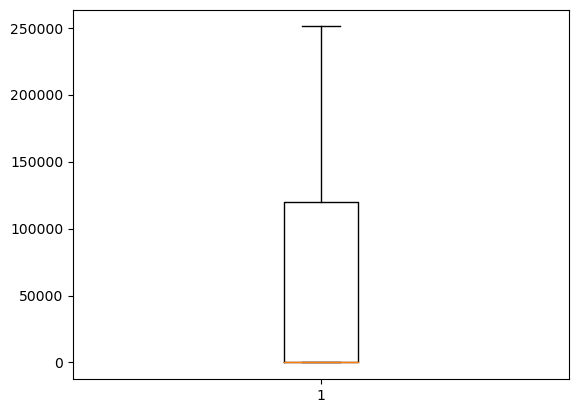

In [15]:
plt.boxplot(df['Balance']);

In [16]:
# Select the data with 0 in 'Balance'.

df_0_balance = df[df['Balance'] == 0]
df_0_balance

CreditScore  Geography  Gender   Age  Tenure  Balance  NumOfProducts  \
0               668          0       1  33.0       3      0.0              2   
1               627          0       1  33.0       1      0.0              2   
2               678          0       1  40.0      10      0.0              2   
4               716          1       1  33.0       5      0.0              2   
8               676          0       1  43.0       4      0.0              2   
...             ...        ...     ...   ...     ...      ...            ...   
165028          630          0       1  50.0       8      0.0              2   
165029          667          1       0  33.0       2      0.0              1   
165030          792          0       1  35.0       3      0.0              1   
165031          565          0       1  31.0       5      0.0              1   
165033          850          0       1  31.0       1      0.0              1   

        HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0               1               0        181449.97       0  
1               1               1         49503.50       0  
2               1               0        184866.69       0  
4               1               1         15068.83       0  
8               1               0        142917.13       0  
...           ...             ...              ...     ...  
165028          1               1          5962.50       0  
165029          1               1        131834.75       0  
165030          0               0        131834.45       0  
165031          1               1        127429.56       0  
165033          1               0         61581.79       1  

[89648 rows x 11 columns]

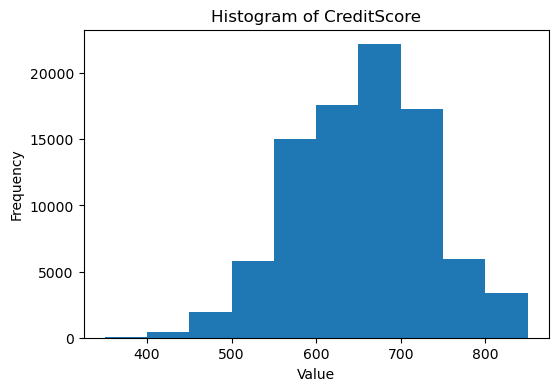

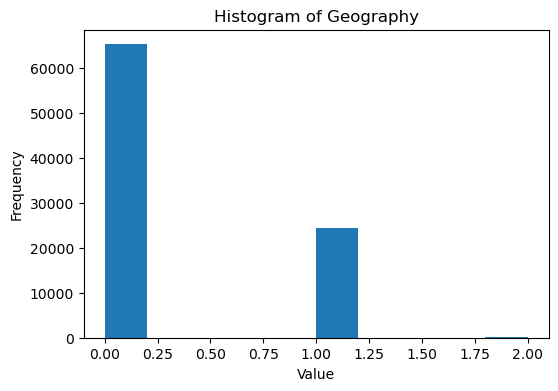

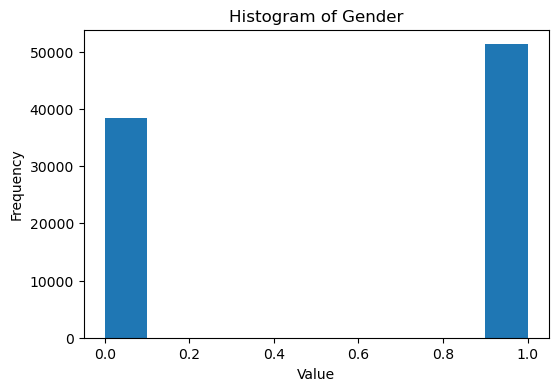

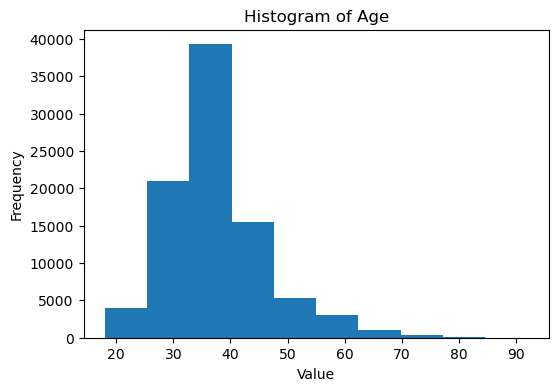

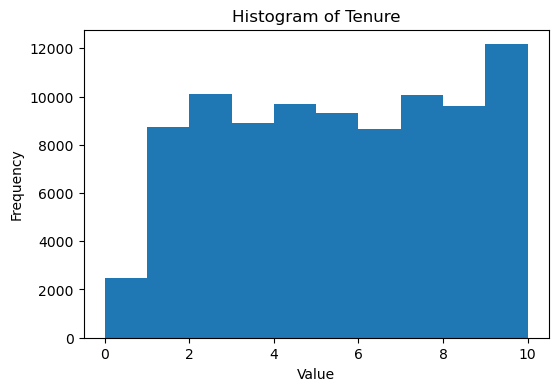

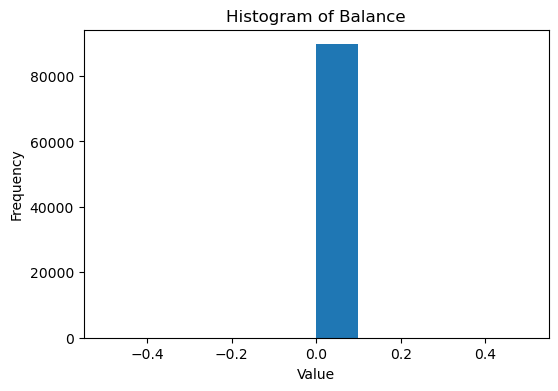

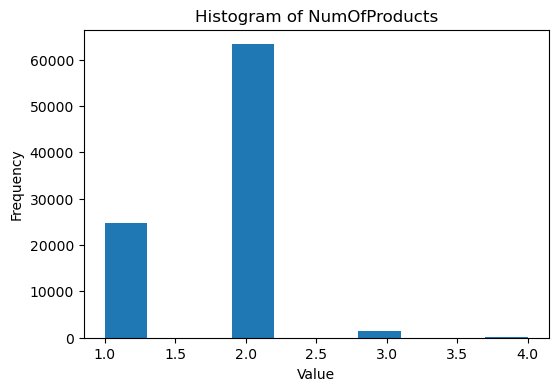

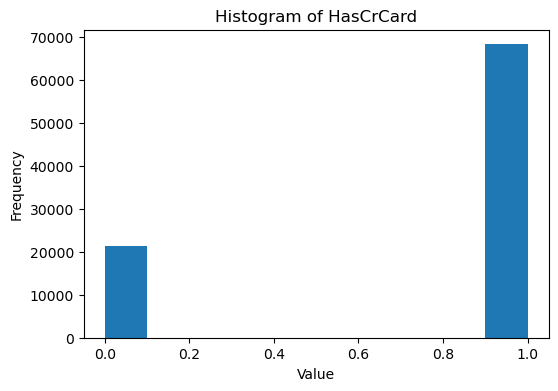

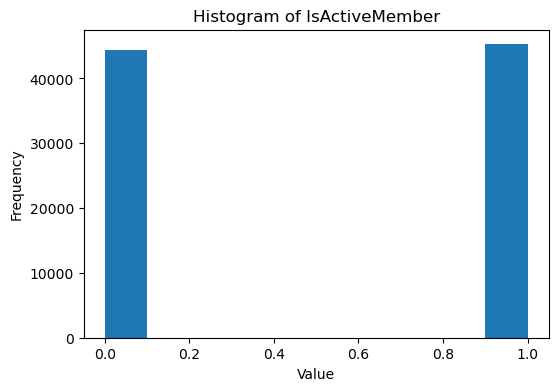

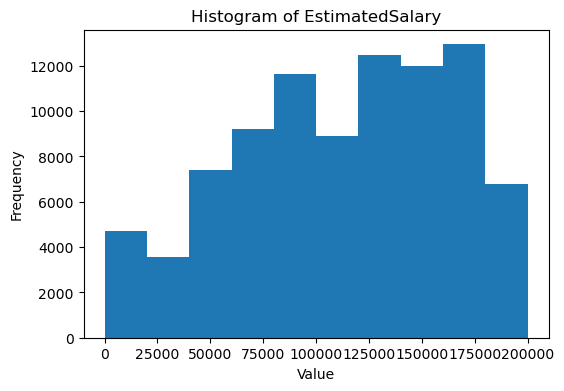

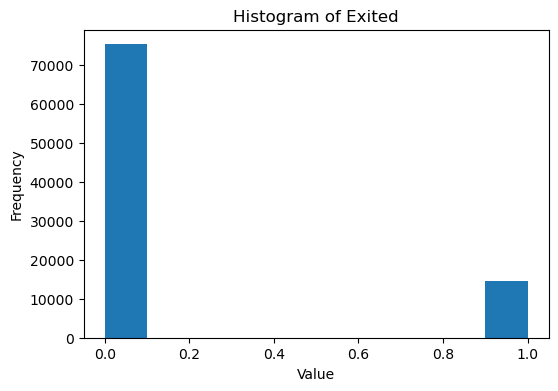

In [17]:
# Check each distribution.

for column in df_0_balance.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_0_balance[column], bins=10)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

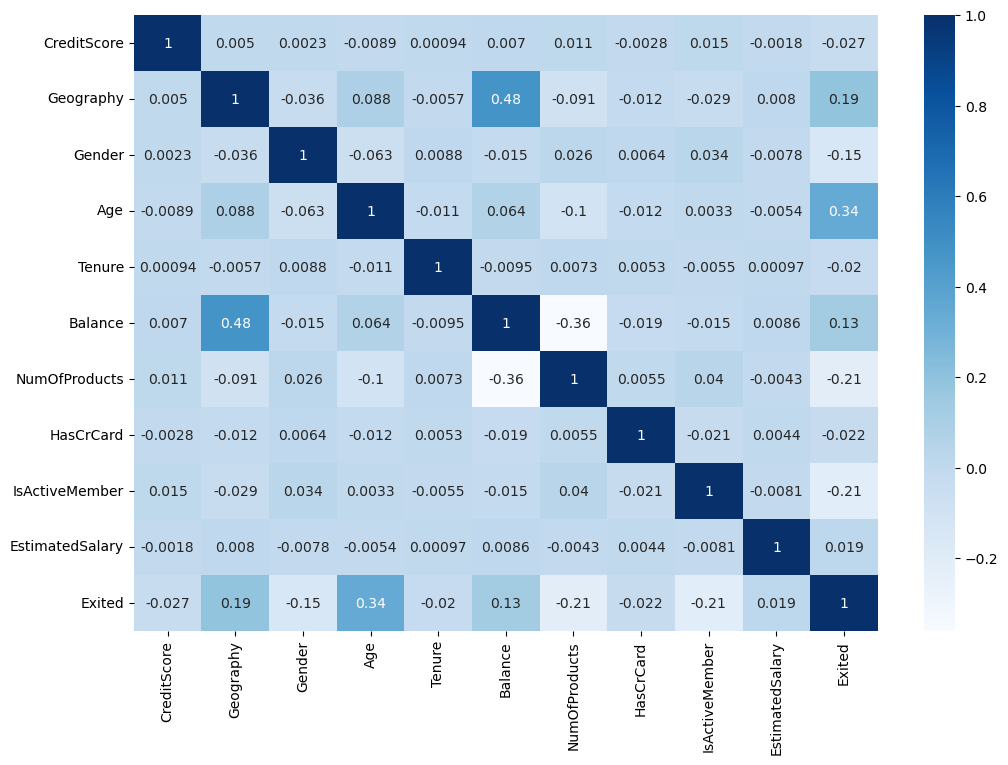

In [18]:
# Check the corrlation from the dataframe with 0 and other values in 'Balance'.

corr_matrix=df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='Blues', annot=True);

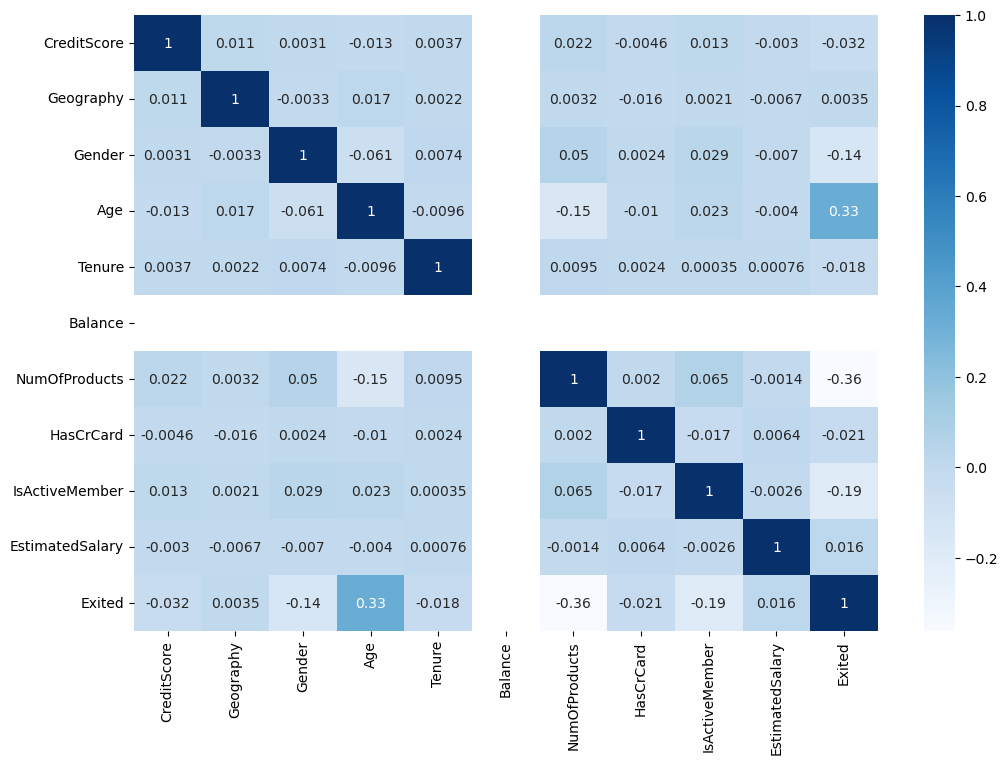

In [19]:
# Check the corrlation from the dataframe with only 0 in 'Balance'.

corr_matrix_balance=df_0_balance.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_balance, cmap='Blues', annot=True);

The data with the value of 0 in 'Balance' will be remained since 'Balance' has considerably low collinearity with 'Exited'.

Although, it looks problematic as the quantile range of 'Balance' shows 0 in 25% and 0 in 50%, the data with 0 in 'Balance' is still meaningful as it shows a similar distribution of the features to the distribution in the data with 0 and the other values in 'Balance'.

In [20]:
# Split the dataset into features and the target.

X = df.iloc[:, 0:10]
y = df.iloc[:, 10]
X

CreditScore  Geography  Gender   Age  Tenure    Balance  \
0               668          0       1  33.0       3       0.00   
1               627          0       1  33.0       1       0.00   
2               678          0       1  40.0      10       0.00   
3               581          0       1  34.0       2  148882.54   
4               716          1       1  33.0       5       0.00   
...             ...        ...     ...   ...     ...        ...   
165029          667          1       0  33.0       2       0.00   
165030          792          0       1  35.0       3       0.00   
165031          565          0       1  31.0       5       0.00   
165032          554          1       0  30.0       7  161533.00   
165033          850          0       1  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                   2          1               0        181449.97  
1                   2          1               1         49503.50  
2                   2          1               0        184866.69  
3                   1          1               1         84560.88  
4                   2          1               1         15068.83  
...               ...        ...             ...              ...  
165029              1          1               1        131834.75  
165030              1          0               0        131834.45  
165031              1          1               1        127429.56  
165032              1          0               1         71173.03  
165033              1          1               0         61581.79  

[165034 rows x 10 columns]

In [21]:
# Normalise the features.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm_df = pd.DataFrame(X_norm)

In [22]:
X_norm_df

0    1    2         3    4         5         6    7    8         9
0       0.636  0.0  1.0  0.202703  0.3  0.000000  0.333333  1.0  0.0  0.907279
1       0.554  0.0  1.0  0.202703  0.1  0.000000  0.333333  1.0  1.0  0.247483
2       0.656  0.0  1.0  0.297297  1.0  0.000000  0.333333  1.0  0.0  0.924364
3       0.462  0.0  1.0  0.216216  0.2  0.593398  0.000000  1.0  1.0  0.422787
4       0.732  0.5  1.0  0.202703  0.5  0.000000  0.333333  1.0  1.0  0.075293
...       ...  ...  ...       ...  ...       ...       ...  ...  ...       ...
165029  0.634  0.5  0.0  0.202703  0.2  0.000000  0.000000  1.0  1.0  0.659179
165030  0.884  0.0  1.0  0.229730  0.3  0.000000  0.000000  0.0  0.0  0.659177
165031  0.430  0.0  1.0  0.175676  0.5  0.000000  0.000000  1.0  1.0  0.637151
165032  0.408  0.5  0.0  0.162162  0.7  0.643819  0.000000  0.0  1.0  0.355841
165033  1.000  0.0  1.0  0.175676  0.1  0.000000  0.000000  1.0  0.0  0.307880

[165034 rows x 10 columns]

In [23]:
print(type(X_norm_df))
print(type(y))
print(X_norm_df.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(165034, 10)
(165034,)


In [24]:
# Convert Pandas to Numpy array.

X = X_norm_df.values
y = y.values

print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(165034, 10)
(165034,)


In [25]:
# Save the features and target as csv files for the matlab code.

#np.savetxt('X.csv', X, delimiter=',')
#np.savetxt('y.csv', y, delimiter=',')

In [53]:
# Convert Numpy array to Tensor.

import torch
import torch.nn as nn

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([165034, 10])
torch.Size([165034])


In [54]:
# Split the data into a train set, a validation set and a test set.
# The code is imported from the link below.
# https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

from sklearn.model_selection import train_test_split

# First split the data into a train and test set. (70% for the train, 30% for the test)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=123)

# Split the train set into a train and validation set. (50% for train, 20% for validation)
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [55]:
# Check the shape.

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

torch.Size([92418, 10])
torch.Size([23105, 10])
torch.Size([49511, 10])
torch.Size([92418])
torch.Size([23105])
torch.Size([49511])


In [56]:
# Make the shapes the same.

y_train = y_train.unsqueeze(1)
y_val = y_val.unsqueeze(1)
y_test = y_test.unsqueeze(1)

print(X_train.dtype, X_train.shape, type(X_train))
print(X_val.dtype, X_val.shape, type(X_val))
print(X_test.dtype, X_test.shape, type(X_test))

print(y_train.dtype, y_train.shape, type(y_train))
print(y_val.dtype, y_val.shape, type(y_val))
print(y_test.dtype, y_test.shape, type(y_test))


torch.float32 torch.Size([92418, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([23105, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([49511, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([92418, 1]) <class 'torch.Tensor'>
torch.float32 torch.Size([23105, 1]) <class 'torch.Tensor'>
torch.float32 torch.Size([49511, 1]) <class 'torch.Tensor'>


In [57]:
# Build a MLP classifier.
# Input: 10 (as the number of features are 10)
# Output: 1
# Activation function: sigmoid


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(10,1)
        self.fc2 = nn.Linear(1,1)
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        hidden = self.fc1(x)
        hidden = self.relu(hidden)
        output = self.fc2(hidden)
        output = self.sigmoid(output)
        return output

In [58]:
model = MLP()
model

MLP(
  (fc1): Linear(in_features=10, out_features=1, bias=True)
  (fc2): Linear(in_features=1, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [59]:
# Use BCELoss as the loss function for binary classification.

import torch.optim as optim

criterion = nn.BCELoss() # default: reduction = mean

In [60]:
# Evaluation the loss before training.

model.eval()
y_pred = model(X_test)
before_train = criterion(y_pred, y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.5519285798072815


In [61]:
y_pred

tensor([[0.3290],
        [0.3304],
        [0.3293],
        ...,
        [0.3290],
        [0.3293],
        [0.3289]], grad_fn=<SigmoidBackward0>)

In [62]:
threshold = 0.5
y_pred_binary = (y_pred > threshold).float()

In [63]:
correct_predictions = (y_pred_binary == y_test).sum().float()
accuracy = correct_predictions / len(y_test)
print('Test accuracy:', accuracy.item())

Test accuracy: 0.7861283421516418


In [64]:
# Update the parameters using Adam optimization: a stochastic optimization. 
# Set the learning rate.

learning_rate = [0.001, 0.0005, 0.0001, 0.00005, 0.00001]
epoch = 10

for lrate in learning_rate:
    optimizer = optim.Adam(model.parameters(), lr=lrate)
    model.train()
    for epoch in range(epoch):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        print('lr {}, Epoch {}: train loss: {}'.format(lrate, epoch, loss.item()))
        loss.backward()
        optimizer.step()

lr 0.001, Epoch 0: train loss: 0.5493602156639099
lr 0.001, Epoch 1: train loss: 0.5491802096366882
lr 0.001, Epoch 2: train loss: 0.5490010380744934
lr 0.001, Epoch 3: train loss: 0.5488227605819702
lr 0.001, Epoch 4: train loss: 0.5486453175544739
lr 0.001, Epoch 5: train loss: 0.5484687089920044
lr 0.001, Epoch 6: train loss: 0.5482930541038513
lr 0.001, Epoch 7: train loss: 0.5481183528900146
lr 0.001, Epoch 8: train loss: 0.5479444265365601
lr 0.001, Epoch 9: train loss: 0.5477715134620667
lr 0.0005, Epoch 0: train loss: 0.5475994348526001
lr 0.0005, Epoch 1: train loss: 0.5475134253501892
lr 0.0005, Epoch 2: train loss: 0.5474275946617126
lr 0.0005, Epoch 3: train loss: 0.5473419427871704
lr 0.0005, Epoch 4: train loss: 0.5472565293312073
lr 0.0005, Epoch 5: train loss: 0.5471712946891785
lr 0.0005, Epoch 6: train loss: 0.547086238861084
lr 0.0005, Epoch 7: train loss: 0.5470014810562134
lr 0.0005, Epoch 8: train loss: 0.5469169020652771
lr 0.0001, Epoch 0: train loss: 0.54683256

In [65]:
model.eval()
y_pred = model(X_test)
after_train = criterion(y_pred, y_test)
print('Test loss after training' , after_train.item())

Test loss after training 0.5492785573005676


In [66]:
y_pred

tensor([[0.3242],
        [0.3252],
        [0.3244],
        ...,
        [0.3242],
        [0.3243],
        [0.3240]], grad_fn=<SigmoidBackward0>)

In [67]:
threshold = 0.5
y_pred_binary = (y_pred > threshold).float()

In [68]:
correct_predictions = (y_pred_binary == y_test).sum().float()
accuracy = correct_predictions / len(y_test)
print('Test accuracy:', accuracy.item())

Test accuracy: 0.7861283421516418


In [ ]:
# Accuracy graph #training time